In [166]:
# Cell 1: 기본 설정
import numpy as np
import matplotlib.pyplot as plt

# Jupyter에서 그래프 크게 보기
plt.rcParams["figure.figsize"] = (8, 3)

## 1. Audio Mixer (Summation)



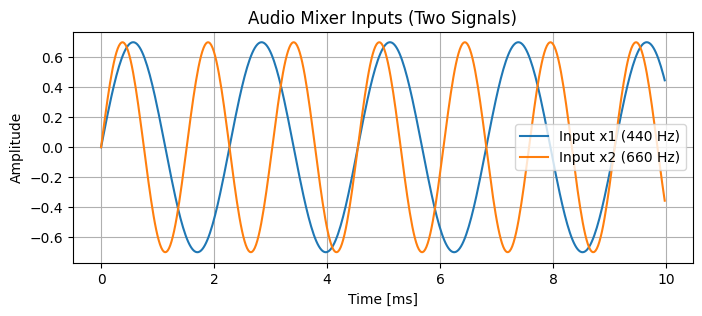

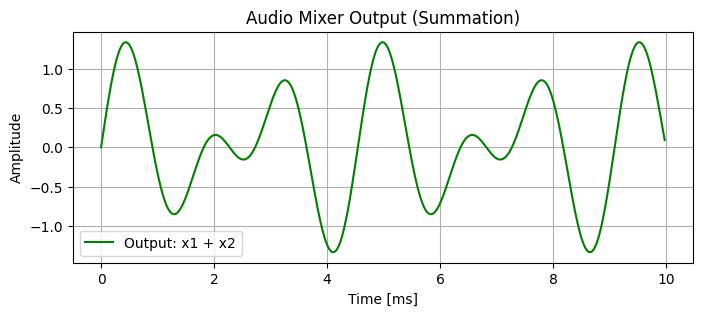

In [167]:
# Cell 2: Audio Mixer - 덧셈(Summation)

# Audio Mixer - 2 Inputs + 1 Output

fs = 44100          # 샘플링 주파수 (44.1 kHz, 오디오)
T  = 0.01           # 10 ms만 보기
t  = np.linspace(0, T, int(fs*T), endpoint=False)

f1 = 440            # A4(라) 440 Hz
f2 = 660            # 660 Hz

x1 = 0.7 * np.sin(2*np.pi*f1*t)
x2 = 0.7 * np.sin(2*np.pi*f2*t)

y_audio = x1 + x2   # Audio Mixer: 단순 덧셈

# figure 1: 두 입력을 한 창에 표시
plt.figure()
plt.plot(t*1000, x1, label="Input x1 (440 Hz)")
plt.plot(t*1000, x2, label="Input x2 (660 Hz)")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Audio Mixer Inputs (Two Signals)")
plt.legend()
plt.grid(True)
plt.show()

# figure 2: 출력만 한 창에 표시
plt.figure()  # figsize=(8, 2)
plt.plot(t*1000, y_audio, label="Output: x1 + x2", color="green")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Audio Mixer Output (Summation)")
plt.legend()
plt.grid(True)
plt.show()

## 2. RF Mixer(Multiplication)     

<br/>


<br/>

### Signal A x Signal B 

<br/>

[Sine/Cosine](https://en.wikipedia.org/wiki/Sine_and_cosine)                    
[Product-to-sum identities](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Product-to-sum_and_sum-to-product_identities)            

<br/>


$$
\sin a \cdot \sin b
=
\frac{1}{2}
\left[
\cos(a-b)
-
\cos(a+b)
\right]
$$

$$
\cos a \cdot \cos b
=
\frac{1}{2}
\left[
\cos(a-b)
+
\cos(a+b)
\right]
$$

$$
\sin a \cdot \cos b
=
\frac{1}{2}
\left[
\sin(a+b)
+
\sin(a-b)
\right]
$$

$$
\cos a \cdot \sin b
=
\frac{1}{2}
\left[
\sin(a+b)
-
\sin(a-b)
\right]
$$

<br/>

e.g 
$$
\cos (ω1t + ϕ1) \cdot \cos (ω2t + ϕ2) 
$$


$$
\cos (ω1t + ϕ1) \cdot \cos (ω2t + ϕ2) 
=
\frac{1}{2}
\left[
\cos((ω1​−ω2)t + (ϕ1​−ϕ2)​ )
+
\cos((ω1​−ω2)t + (ϕ1​−ϕ2)​ )
\right]
$$

### use LPF After Mixer Output

<br/>

아래와 같이 각 Frequcy 차이/합  Phase 차이/합 알 수 있으며, LPF에 의해 이를 제거 

<br/>

| Component | Frequency Term | Phase Term | Usage |
|----------|----------------|------------|------|
| **IF (Difference)** | Δf = ω1​−ω2 | Δφ = ϕ1​−ϕ2​ |  ✔ Radar/RF Mixer used|
| **HF (Sum)** |   Δf = ω1+ω2 | Δφ = ϕ1​+ϕ2​ | ✖ Removed by LPF  |


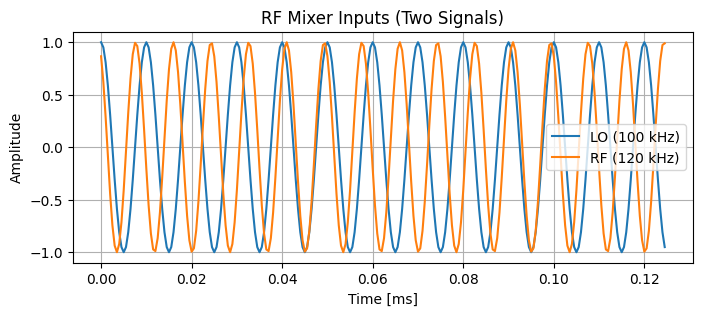

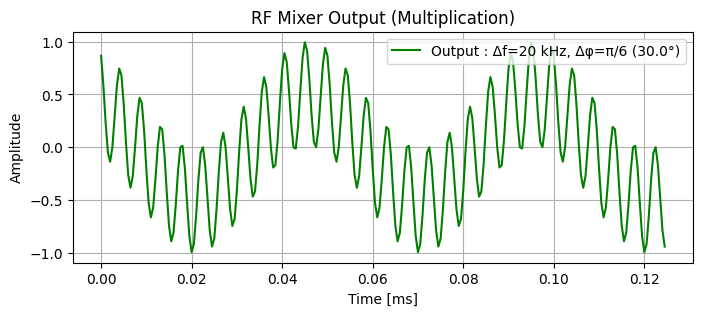

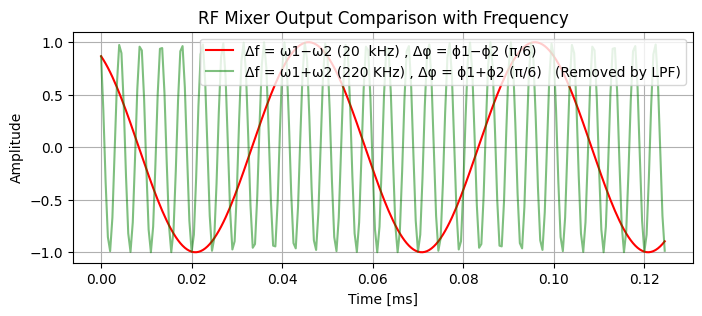

In [168]:
# Cell 2: RF Mixer - 곱셈(Multiplication)으로 주파수/위상 차이 생성

fs = 2000_000        # Sampling Frequency 2000 kHz 
T  = 0.000125        # 0.125 ms   Y축 
t  = np.linspace(0, T, int(fs*T), endpoint=False)

f_lo = 100_000      # LO = 100 kHz
f_rf = 120_000      # RF = 120 kHz

phi_lo = 0.0
phi_rf = np.deg2rad(30)  # RF 위상 30도

lo = np.cos(2*np.pi*f_lo*t + phi_lo)
rf = np.cos(2*np.pi*f_rf*t + phi_rf)

# RF Mixer: 곱셈
y_rf = lo * rf      # x_out = x1 * x2

# RF Comapre  Δf
f_diff_1 = abs(f_rf - f_lo)  # 20 kHz
f_diff_2 = abs(f_rf + f_lo)  # 220 kHz

# RF Comapre  Δφ
phi_diff = phi_rf - phi_lo   
phi_diff_deg = np.rad2deg(phi_diff) # 도(degree)로 보기 좋게
phi_pi = phi_diff / np.pi  # π 기준 환산

comp1 = np.cos(2*np.pi*f_diff_1*t + phi_rf)
comp2 = np.cos(2*np.pi*f_diff_2*t + phi_rf)




# figure 1: 두 입력을 한 창에 표시
plt.figure()
plt.plot(t*1000, lo, label="LO (100 kHz)")
plt.plot(t*1000, rf, label="RF (120 kHz)")
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("RF Mixer Inputs (Two Signals)")
plt.legend()
plt.grid(True)
plt.show()

# figure 2: 출력만 한 창에 표시
textstr1 = f'Output : Δf={f_diff_1/1000:.0f} kHz, Δφ=π/6 ({phi_diff_deg:.1f}°)'
plt.figure()
plt.plot(t*1000, y_rf, label=textstr1, color="green",linewidth=1.5)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("RF Mixer Output (Multiplication)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# figure 3: Compare Output with Expected Difference Signal
textstr2 = f'Δf = ω1​−ω2 (20  kHz) , Δφ = ϕ1​−ϕ2​ (π/6)     '
textstr3 = f'Δf = ω1+ω2 (220 KHz) , Δφ = ϕ1+ϕ2 (π/6)   (Removed by LPF)'
plt.figure()
plt.plot(t*1000, comp1, label=textstr2, color="red",linewidth=1.5)
plt.plot(t*1000, comp2, label=textstr3, color="green",linewidth=1.5,alpha=0.5)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("RF Mixer Output Comparison with Frequency")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

